In [77]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [79]:
symbols = ['AAPL','MSFT','AMD','NVDA']
start = '2021-08-20'
end = '2022-08-20'
dataset = yf.download(symbols,start,end)['Adj Close']
dataset.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMD,MSFT,NVDA
Date,,,,
2022-08-15,173.190002,101.010002,292.848389,190.320007
2022-08-16,173.029999,100.199997,292.089996,188.789993
2022-08-17,174.550003,98.269997,291.320007,183.350006
2022-08-18,174.149994,100.440002,290.170013,187.729996
2022-08-19,171.520004,95.949997,286.149994,178.490005


In [80]:
returns = dataset.pct_change()
returns = returns.dropna()
returns.tail()

,AAPL,AMD,MSFT,NVDA
Date,,,,
2022-08-15,0.006334,0.001785,0.005344,0.017264
2022-08-16,-0.000924,-0.008019,-0.002590,-0.008039
2022-08-17,0.008785,-0.019261,-0.002636,-0.028815
2022-08-18,-0.002292,0.022082,-0.003948,0.023889
2022-08-19,-0.015102,-0.044703,-0.013854,-0.049220


In [81]:
meanDailyReturns = returns.mean()
print(meanDailyReturns)

AAPL    0.000789
AMD     0.000308
MSFT   -0.000032
NVDA    0.000098
dtype: float64


In [82]:
stdDailyReturns = returns.std()
print(stdDailyReturns)

AAPL    0.019204
AMD     0.036244
MSFT    0.019007
NVDA    0.037808
dtype: float64


In [83]:
weights = np.array([0.5, 0.2, 0.2, 0.1])

In [84]:
cov_matrix = (returns.cov())*250
print (cov_matrix)

          AAPL       AMD      MSFT      NVDA
AAPL  0.092200  0.114033  0.071176  0.130359
AMD   0.114033  0.328407  0.114174  0.294162
MSFT  0.071176  0.114174  0.090320  0.132820
NVDA  0.130359  0.294162  0.132820  0.357358


In [85]:
portReturn = np.sum(meanDailyReturns*weights)
print(portReturn)

0.0004593727888491032


In [86]:
returns['Portfolio'] = returns.dot(weights)
returns.head()

,AAPL,AMD,MSFT,NVDA,Portfolio
Date,,,,,
2021-08-23,0.010257,0.039369,0.000953,0.054862,0.018679
2021-08-24,-0.000601,-0.010297,-0.006663,-0.007514,-0.004444
2021-08-25,-0.008421,0.006038,-0.002016,0.019272,-0.001479
2021-08-26,-0.005527,-0.009511,-0.009669,-0.006528,-0.007252
2021-08-27,0.007185,0.038501,0.002106,0.025739,0.014288


In [87]:
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                AAPL       AMD      MSFT      NVDA  Portfolio
Date                                                         
2022-08-15  1.175251  0.965217  0.970236  0.914919   1.084634
2022-08-16  1.174165  0.957477  0.967723  0.907564   1.080960
2022-08-17  1.184480  0.939035  0.965172  0.881412   1.077859
2022-08-18  1.181766  0.959771  0.961362  0.902468   1.083108
2022-08-19  1.163919  0.916866  0.948044  0.858049   1.056914


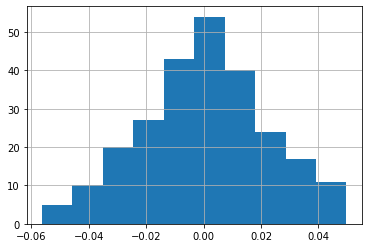

In [88]:
returns['Portfolio'].hist()
plt.show()

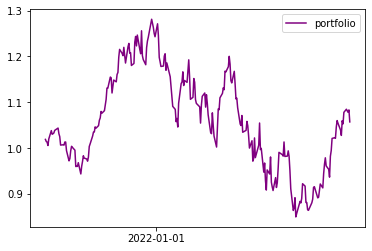

In [89]:
import matplotlib.dates
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [90]:
print("mean : ", returns['Portfolio'].mean()*100)
print("Std. dev: ", returns['Portfolio'].std()*100)
print("skew: ", returns['Portfolio'].skew())
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.04593727888491035
Std. dev:  2.1878154177119935
skew:  -0.12293762237392944
kurt:  -0.18404441943450855


In [91]:
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))
print(str(np.round(port_standard_dev,5) * 100) + '%')

34.592%


In [92]:
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
print(str(np.round(port_variance, 4) * 100) + '%')

11.97%


In [93]:
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]
annualized_return = ((total_return + 1)**(1/6))-1

In [94]:
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [95]:
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print (sharpe_ratio)

nan


In [96]:
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.04593727888491035
--------------------------------------------------
Downside risk:
AAPL         1.412356
AMD          2.512684
MSFT         1.427681
NVDA         2.435790
Portfolio    1.405057
dtype: float64
--------------------------------------------------
Sortino ratio:
AAPL        -0.675512
AMD         -0.379699
MSFT        -0.668260
NVDA        -0.391685
Portfolio   -0.679021
dtype: float64


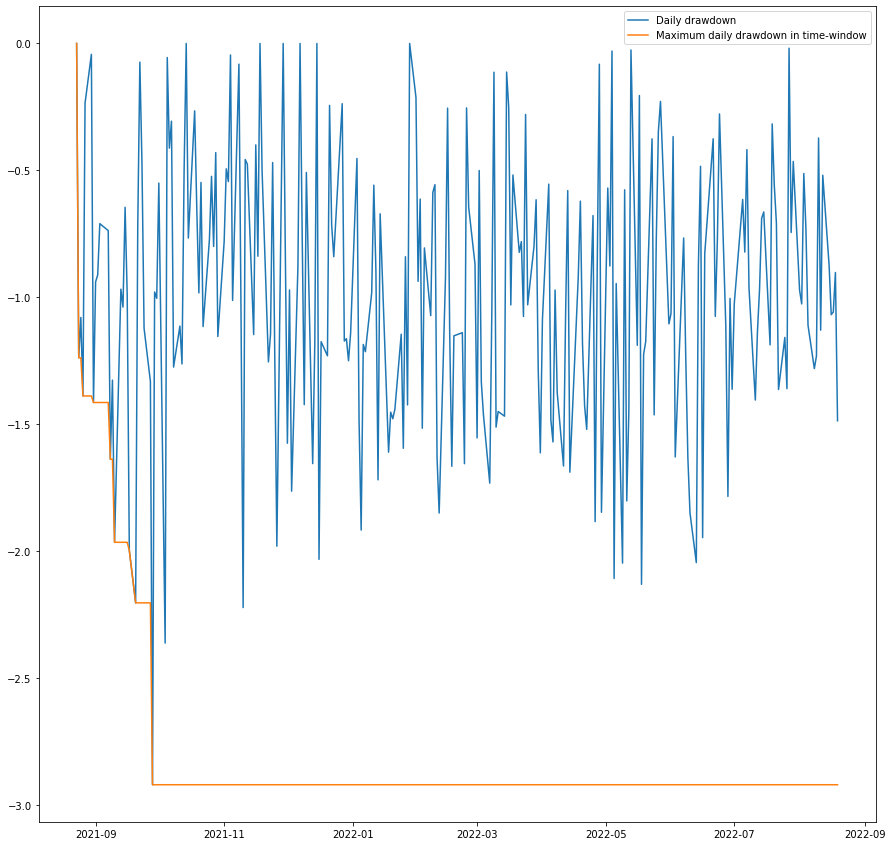

In [97]:
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()
daily_draw_down = returns['Portfolio']/roll_max - 1.0
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()